In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
acc = pd.read_csv('accidents.csv')

In [4]:
acc.head()

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,...,False,False,False,False,False,False,False,False,False,False
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,...,False,False,False,False,False,False,False,False,False,False
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,...,False,False,False,False,False,False,False,False,False,False
3,2,2018-03-09 08:02:11,2018-03-09 08:49:15,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,...,False,False,False,False,False,False,False,False,False,False
4,2,2020-03-27 05:36:56,2020-03-27 06:36:48,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,...,False,False,False,False,False,False,False,False,False,False


In [5]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Severity          100000 non-null  int64  
 1   StartTime         100000 non-null  object 
 2   EndTime           100000 non-null  object 
 3   StartLat          100000 non-null  float64
 4   StartLng          100000 non-null  float64
 5   Distance          100000 non-null  float64
 6   Street            100000 non-null  object 
 7   City              100000 non-null  object 
 8   State             100000 non-null  object 
 9   Zipcode           100000 non-null  int64  
 10  Temperature       100000 non-null  float64
 11  Humidity          100000 non-null  float64
 12  Pressure          100000 non-null  float64
 13  Visibility        100000 non-null  float64
 14  WindSpeed         100000 non-null  float64
 15  Precipitation     100000 non-null  float64
 16  WeatherCondition  100

In [7]:
acc.isnull().sum()

Severity            0
StartTime           0
EndTime             0
StartLat            0
StartLng            0
Distance            0
Street              0
City                0
State               0
Zipcode             0
Temperature         0
Humidity            0
Pressure            0
Visibility          0
WindSpeed           0
Precipitation       0
WeatherCondition    0
Amenity             0
Bump                0
Crossing            0
GiveWay             0
Junction            0
NoExit              0
Railway             0
Roundabout          0
Station             0
Stop                0
TrafficCalming      0
TrafficSignal       0
dtype: int64

In [9]:
taken_feau =  acc[['Temperature', 'Pressure', 'Visibility', 'WindSpeed']]

In [10]:
taken_feau.head()

,Temperature,Pressure,Visibility,WindSpeed
0,93.0,28.86,10.0,16.0
1,51.1,30.23,10.0,9.2
2,64.9,29.99,10.0,8.1
3,27.0,30.04,10.0,5.8
4,68.0,29.20,10.0,7.0


## Apply K-means for various K-values

### Inertia (Within clusters sum of squares)

In [39]:
inertia_values = []
sillhouette_scores = []
k_range = range(2,11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(taken_feau)
    inertia_values.append(kmeans.inertia_)

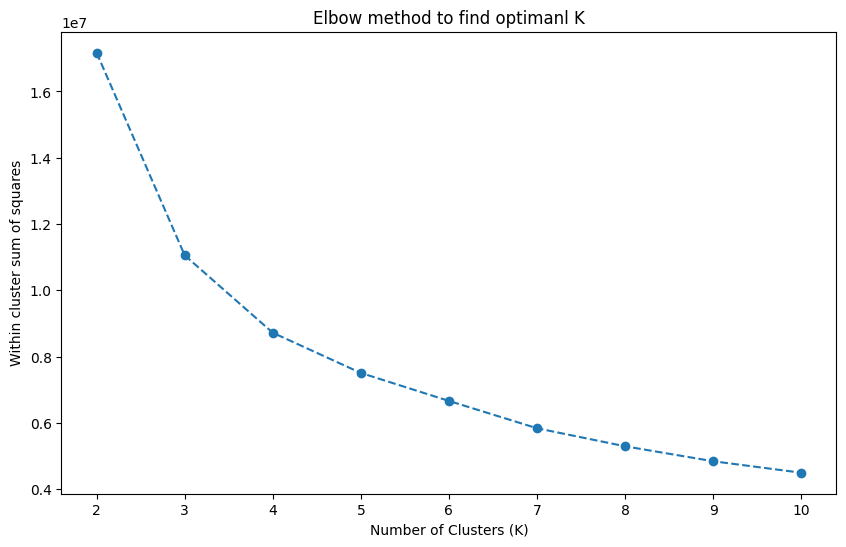

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within cluster sum of squares')
plt.title('Elbow method to find optimanl K')
plt.show()

### Silhouette Score

In [45]:
# silhouette = silhouette_score(taken_feau, kmeans.labels_)
# silhouette_scores.append(silhouette)

### Inertia (within-cluster sum of squares)

In [44]:
inertia_values.append(kmeans.inertia_)

## Elbow Method

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
bank['Cluster'] = kmeans.fit_predict(taken_feau)

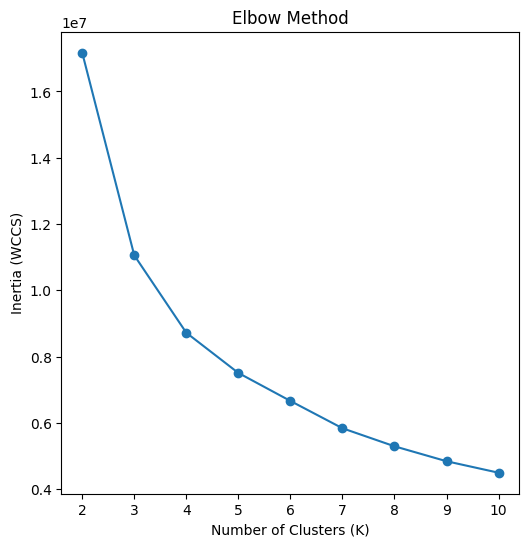

In [28]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCCS)')
plt.title('Elbow Method')
plt.show()

## Silhouette Score